<a href="https://colab.research.google.com/github/Sharan-kalburgi/Dental-website/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload your dataset.zip file
uploaded = files.upload()


Saving news.zip to news.zip


In [2]:
import zipfile
import io

# Assuming your file is named dataset.zip
with zipfile.ZipFile(io.BytesIO(uploaded['news.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/news')

In [3]:
import os
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn import preprocessing

# Function to load data from sub-folders
def load_data(folder_path):
    categories = os.listdir(folder_path)
    data = []
    target = []

    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        data.append(content)
                        target.append(category)

    return data, target

# Load data from your dataset
folder_path = '/content/news'
data, target = load_data(folder_path)

# Label encoding for target variable
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Tokenize the data using GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt', max_length=512)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt', max_length=512)

# Convert labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained GPT-2 model for sequence classification
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=len(le.classes_))

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_loader, desc='Epoch {}'.format(epoch+1)):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

for batch in tqdm(test_loader, desc='Evaluating'):
    input_ids, attention_mask, labels = batch
    input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

# Print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report with precision, recall, and F1-score
class_report = classification_report(all_labels, all_preds, target_names=le.classes_)
print("Classification Report:")
print(class_report)


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

ValueError: ignored

In [4]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm
from sklearn import preprocessing

# Function to load data from sub-folders
def load_data(folder_path):
    categories = os.listdir(folder_path)
    data = []
    target = []

    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        data.append(content)
                        target.append(category)

    return data, target

# Load data from your dataset
folder_path = '/content/news'
data, target = load_data(folder_path)

# Label encoding for target variable
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Tokenize the data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt', max_length=512)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt', max_length=512)

# Convert labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_loader, desc='Epoch {}'.format(epoch+1)):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

for batch in tqdm(test_loader, desc='Evaluating'):
    input_ids, attention_mask, labels = batch
    input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

# Print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report with precision, recall, and F1-score
class_report = classification_report(all_labels, all_preds, target_names=le.classes_)
print("Classification Report:")
print(class_report)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|██████████| 25/25 [04:07<00:00,  9.89s/it]

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 1  0  0  0  0  0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

     business       0.93      1.00      0.96        13
entertainment       1.00      1.00      1.00        20
         food       1.00      1.00      1.00        27
     graphics       1.00      1.00      1.00        21
   historical       1.00      1.00      1.00        13
      medical       1.00      1.00      1.00        15
     politics       1.00      1.00      1.00        25
        space       1.00      1.00      1.00        23
        sport       1.00      1.00      1.00        21
  technologie       1.00      0.95      0.98        22

     accuracy        

In [5]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load data from sub-folders
def load_data(folder_path):
    # ... (unchanged)

# ... (unchanged)

# Print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report with precision, recall, and F1-score
class_report = classification_report(all_labels, all_preds, target_names=le.classes_)
print("Classification Report:")
print(class_report)


IndentationError: ignored

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|██████████| 25/25 [04:51<00:00, 11.64s/it]


Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0  0 22]]


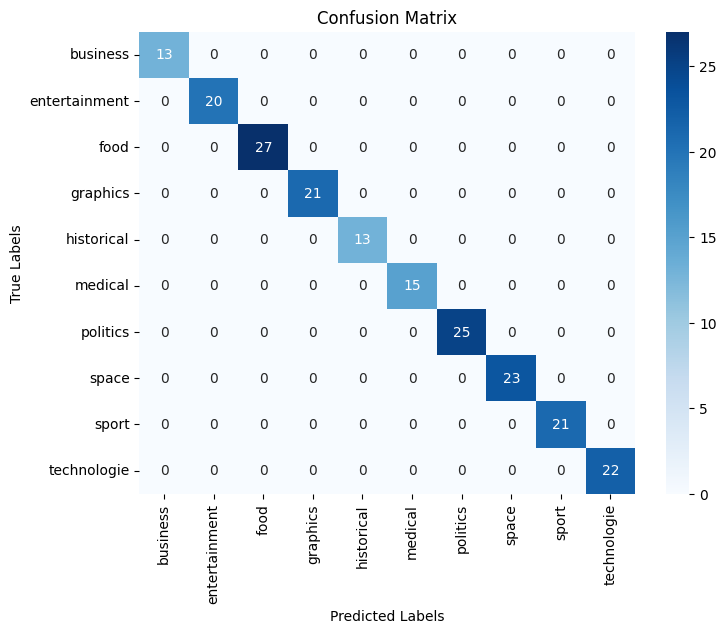

Classification Report:
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        13
entertainment       1.00      1.00      1.00        20
         food       1.00      1.00      1.00        27
     graphics       1.00      1.00      1.00        21
   historical       1.00      1.00      1.00        13
      medical       1.00      1.00      1.00        15
     politics       1.00      1.00      1.00        25
        space       1.00      1.00      1.00        23
        sport       1.00      1.00      1.00        21
  technologie       1.00      1.00      1.00        22

     accuracy                           1.00       200
    macro avg       1.00      1.00      1.00       200
 weighted avg       1.00      1.00      1.00       200



In [6]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load data from sub-folders
def load_data(folder_path):
    categories = os.listdir(folder_path)
    data = []
    target = []

    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        data.append(content)
                        target.append(category)

    return data, target

# Load data from your dataset
folder_path = '/content/news'
data, target = load_data(folder_path)

# Label encoding for target variable
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Tokenize the data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt', max_length=512)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt', max_length=512)

# Convert labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_loader, desc='Epoch {}'.format(epoch+1)):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

for batch in tqdm(test_loader, desc='Evaluating'):
    input_ids, attention_mask, labels = batch
    input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

# Print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report with precision, recall, and F1-score
class_report = classification_report(all_labels, all_preds, target_names=le.classes_)
print("Classification Report:")
print(class_report)
